# Tas (Heap)

In [1]:
import include.tas as h

Un **tas** est un tableau que l'on se représente comme un arbre binaire complet. 

Il respecte la **condition de tas** 

* tout élément est plus grand (ou égal) que ses enfants
* tout élément est plus petit (ou égal) que son parent 

Par exemple, le tableau suivant est un tas

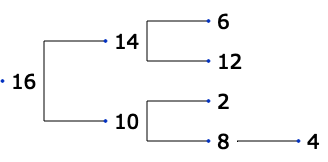

In [2]:
T = [ 16, 10, 14, 8, 2, 12, 6, 4]
h.afficher_tas(T)

## Parenté (implicite)

Pour un tas dont les indices sont numérotés de $0$ à $n-1$, les relations de parenté s'écrivent

In [3]:
def parent(i): 
    return (i-1) // 2
def enfants(i): 
    return 2*i+1, 2*i+2

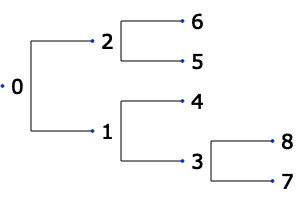

In [4]:
I0 = [ 0, 1, 2, 3, 4, 5, 6, 7, 8 ]
h.afficher_tas(I0)

## Insertion

L'insertion d'un élément dans le tas s'effectue en deux étapes
* insertion de l'élément en queue de tableau. 
* rétablissement de la condition de tas

[16, 10, 14, 8, 2, 12, 6, 4, 13]


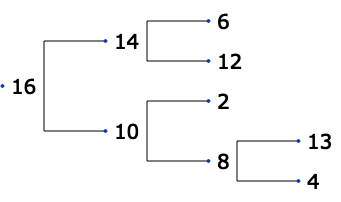

In [5]:
T.append(13); print(T); h.afficher_tas(T) 
# 13 ne respecte pas la condition de tas

Pour rétablir la condition de tas, il faut faire **remonter** l'élément dans le tas en l'échangeant avec son parent jusqu'à ce qu'il 

* soit plus petit que son parent
* ou aie atteint le sommet du tas

In [6]:
def remonter(T,i):
    p = parent(i)
    while i > 0 and T[p] < T[i]:
        print("swap({},{})".format(T[i],T[p]))
        T[p],T[i] = T[i],T[p]
        i = p; p = parent(i)

[16, 10, 14, 8, 2, 12, 6, 4, 13]
swap(13,8)
swap(13,10)
[16, 13, 14, 10, 2, 12, 6, 4, 8]


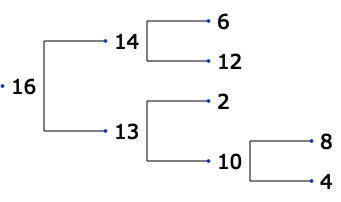

In [7]:
print(T)
remonter(T,len(T)-1)
print(T)
h.afficher_tas(T)

L'insertion d'un élément dans le tas s'écrit donc 

In [8]:
def inserer_dans_tas(T,val):
    T.append(val)
    remonter(T,len(T)-1)

La complexité de l'opération est 

* $\Theta(1)$ en moyenne pour `T.append(val)`
* $\Theta(\log n)$ au pire pour `remonter(T,n)`

Elle est donc logarithmique

## Suppression du sommet

Dans un tas, le seul élément que l'on puisse supprimer est 

* le plus grand,
* situé au sommet du tas, 
* en tête du tableau, à l'indice 0

Mais un tas est un tableau, et la seule position d'où l'on peut supprimer efficacement un élément est en queue. On commence donc par échanger tête et queue. 

[16, 13, 14, 10, 2, 12, 6, 4, 8]
[8, 13, 14, 10, 2, 12, 6, 4, 16]
[8, 13, 14, 10, 2, 12, 6, 4]


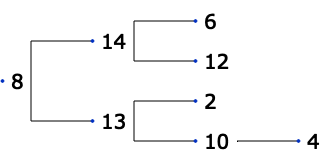

In [9]:
print(T); T[0],T[len(T)-1] = T[len(T)-1],T[0]
print(T); T.pop()
print(T); h.afficher_tas(T)

Mais l'élément au sommet ne respecte pas la condition de tas. Il faut rétablir la condition de tas en le descendant. 

Pour faire descendre un élément, on l'échange avec **le plus grand de ses enfants** jusqu'à ce qu'il respecte la condition de tas ou qu'il atteigne le fond. 

In [10]:
def plus_grand_enfant(T,i):
    pge, e2 = enfants(i)
    if e2 < len(T) and T[e2] > T[pge]:
        pge = e2
    return pge
    
def descendre(T,i):
    e = plus_grand_enfant(T,i)
    while e < len(T) and T[i] < T[e]:
        print("swap({},{})".format(T[i],T[e]))
        T[i],T[e] = T[e],T[i]
        i = e
        e = plus_grand_enfant(T,i)

[8, 13, 14, 10, 2, 12, 6, 4]
swap(8,14)
swap(8,12)
[14, 13, 12, 10, 2, 8, 6, 4]


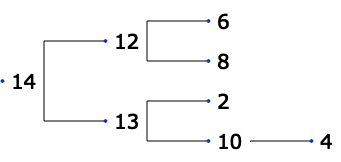

In [11]:
print(T); descendre(T,0)
print(T); h.afficher_tas(T)

La suppression du sommet de l'élément au sommet du tas s'écrit donc 

In [12]:
def supprimer_sommet(T):
    T[0],T[len(T)] = T[len(T)],T[0]
    T.pop()
    descendre(T,0)

La complexité de l'opération est 

* $\Theta(1)$ en pour l'échange et `T.pop()`
* $\Theta(\log n)$ au pire pour `descendre(T,0)`

Elle est donc logarithmique

## Création d'un tas

La manière la plus simple de transformer un tableau en tas est d'en insérer tous les éléments un par un.

Effectuée en place, cette opération s'écrit

In [13]:
def creer_tas_naif(T):
    for i in range(1,len(T)):
        remonter(T,i)

swap(2,1)
swap(5,2)
swap(7,1)
swap(7,5)
swap(9,5)
swap(9,7)
swap(3,2)
swap(4,3)
swap(6,1)
swap(8,6)
swap(8,7)


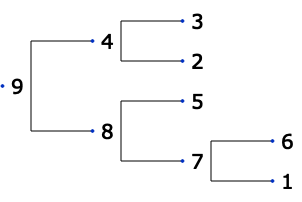

In [14]:
T = [ 1, 2, 5, 7, 9, 3, 4, 6, 8 ]
creer_tas_naif(T); h.afficher_tas(T)

Cette approche a une complexité $\Theta(n \log n)$.

Il est possible de faire mieux. 

* Plutôt que de monter les éléments du premier au dernier, 
* on les fait descendre du dernier au premier. 

plus exactement, on commence par le dernier élément à avoir des enfants, i.e. le parent du dernier élément

In [15]:
def creer_tas(T):
    for i in range(parent(len(T)-1),-1,-1):
        descendre(T,i)

Visualisons l'algorithme

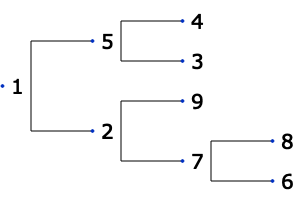

In [16]:
T = [ 1, 2, 5, 7, 9, 3, 4, 6, 8 ]
h.afficher_tas(T)

In [17]:
descendre(T,3)

swap(7,8)


[1, 2, 5, 8, 9, 3, 4, 6, 7]


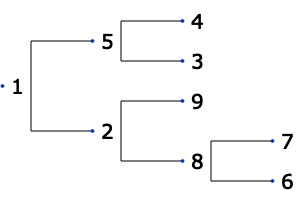

In [18]:
print(T); h.afficher_tas(T)

In [19]:
descendre(T,2)

[1, 2, 5, 8, 9, 3, 4, 6, 7]


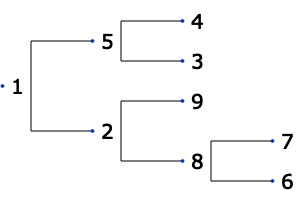

In [20]:
print(T); h.afficher_tas(T)

In [21]:
descendre(T,1)

swap(2,9)


[1, 9, 5, 8, 2, 3, 4, 6, 7]


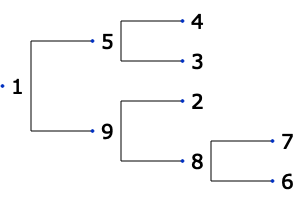

In [22]:
print(T); h.afficher_tas(T)

In [23]:
descendre(T,0)

swap(1,9)
swap(1,8)
swap(1,7)


[9, 8, 5, 7, 2, 3, 4, 6, 1]


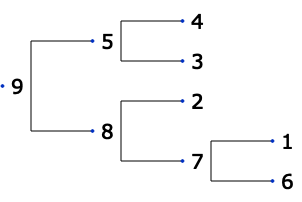

In [24]:
print(T); h.afficher_tas(T)

Comparons les deux approches

swap(3,7)
swap(2,5)
swap(1,7)
swap(1,6)


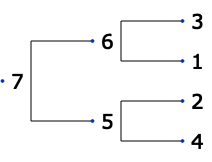

In [25]:
T = [ 1, 2, 3, 4, 5, 6, 7 ]; 
creer_tas(T); h.afficher_tas(T)

swap(2,1)
swap(3,2)
swap(4,1)
swap(4,3)
swap(5,3)
swap(5,4)
swap(6,2)
swap(6,5)
swap(7,5)
swap(7,6)


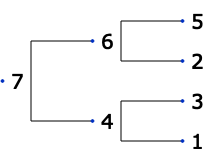

In [26]:
T = [ 1, 2, 3, 4, 5, 6, 7 ]; 
creer_tas_naif(T); h.afficher_tas(T)

La **complexité** de l'algorithme de **création de tas** par descente est **linéaire** à la taille du tas. 

En effet, considérons le nombre maximum d'échanges pour la descente de l'élément d'indice `i`, en approximant les intervalles pour simplifier

* `i` $\in$ `[n/2,n[`, 0 échange
* `i` $\in$ `[n/4,n/2[`, 1 échange
* `i` $\in$ `[n/8,n/4[`, 2 échanges
* `i` $\in$ `[n/16,n/8[`, 3 échanges
* ...
* `i == 0`, $\log n$ échanges

La somme de tous ces termes est $\Theta(n)$ 

## Tri par tas 

La structure de tas nous permet d'améliorer l'efficacité du tri par sélection. Pour rappel, celui-ci était 

In [27]:
def tri_par_selection(T):
    N = len(T)
    for i in range(0,N-1):
        jMin = i
        for j in range(i+1,N):
            if T[j] < T[jMin]:
                jMin = j
        T[i],T[jMin] = T[jMin],T[i]

la boucle interne sur `j` cherche le minimum de `T[i:N]` avec une complexité linéaire, ce qui entraine une complexité globale quadratique pour le tri.  

Le structure de tas nous permet de trouver le maximum en temps constant et de le supprimer en temps logarithmique. 

On réécrit le tri par sélection à l'envers pour pouvoir en profiter. 

In [28]:
def element_max(T,n):
    el_max = 0
    for j in range(1,n):
        if T[j] > T[el_max]: el_max = j
    return el_max

def tri_par_selection_max(T):
    for i in range(len(T)-1,0,-1):
        m = element_max(T,i+1)
        T[i],T[m] = T[m],T[i]
        print(T[:i],T[i:])

In [29]:
T = [ 4, 2, 7, 5, 9, 1, 3, 8, 6 ]
tri_par_selection_max(T)

[4, 2, 7, 5, 6, 1, 3, 8] [9]
[4, 2, 7, 5, 6, 1, 3] [8, 9]
[4, 2, 3, 5, 6, 1] [7, 8, 9]
[4, 2, 3, 5, 1] [6, 7, 8, 9]
[4, 2, 3, 1] [5, 6, 7, 8, 9]
[1, 2, 3] [4, 5, 6, 7, 8, 9]
[1, 2] [3, 4, 5, 6, 7, 8, 9]
[1] [2, 3, 4, 5, 6, 7, 8, 9]


Pour améliorer cet algorithme, on va maintenir `T[:i]`, la partie non encore triée, sous forme de tas.  

Il faut pouvoir traiter comme un tas les $n$ premiers éléments d'un tableau plutôt que le tableau complet. On ré-écrit donc les fonctions 

In [30]:
def plus_grand_enfant(T,i,n):
    pge, e2 = enfants(i)
    if e2 < n and T[e2] > T[pge]:
        pge = e2
    return pge
    
def descendre(T,i,n = None):
    if n == None: n = len(T) 
    e = plus_grand_enfant(T,i,n)
    while e < n and T[i] < T[e]:
        T[i],T[e] = T[e],T[i]
        i = e
        e = plus_grand_enfant(T,i,n)

Cela nous permet d'écrire l'algorithme de tri par tas, de complexité linéarithmique $\Theta(n \log n)$

In [31]:
def tri_par_tas(T):
    creer_tas(T)
    print(T)
    for i in range(len(T)-1,0,-1):
        T[i],T[0] = T[0],T[i]
        descendre(T,0,i)
        print(T[:i],T[i:])

In [32]:
T = [ 1, 2, 3, 4, 5, 6, 7, 8]
tri_par_tas(T)

# T[:i] est un tas, T[i:] est trié

[8, 5, 7, 4, 1, 6, 3, 2]
[7, 5, 6, 4, 1, 2, 3] [8]
[6, 5, 3, 4, 1, 2] [7, 8]
[5, 4, 3, 2, 1] [6, 7, 8]
[4, 2, 3, 1] [5, 6, 7, 8]
[3, 2, 1] [4, 5, 6, 7, 8]
[2, 1] [3, 4, 5, 6, 7, 8]
[1] [2, 3, 4, 5, 6, 7, 8]


Suivons l'exécution pas à pas

[7, 5, 6, 4, 2, 1, 3]


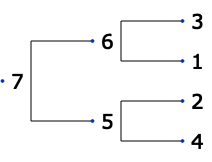

In [33]:
T = [ 1, 2, 3, 4, 5, 6, 7 ]; creer_tas(T); 
print(T); h.afficher_tas(T)

In [35]:
i = 6; T[i],T[0] = T[0],T[i]; descendre(T,0,i)

[6, 5, 3, 4, 2, 1] [7]


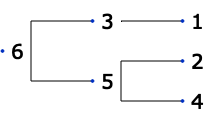

In [36]:
print(T[:i],T[i:]); h.afficher_tas(T[:i])

In [37]:
i = 5; T[i],T[0] = T[0],T[i]; descendre(T,0,i)

[5, 4, 3, 1, 2] [6, 7]


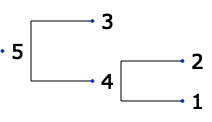

In [38]:
print(T[:i],T[i:]); h.afficher_tas(T[:i])

In [39]:
i = 4; T[i],T[0] = T[0],T[i]; descendre(T,0,i)

[4, 2, 3, 1] [5, 6, 7]


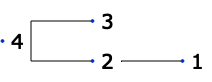

In [40]:
print(T[:i],T[i:]); h.afficher_tas(T[:i])

In [41]:
i = 3; T[i],T[0] = T[0],T[i]; descendre(T,0,i)

[3, 2, 1] [4, 5, 6, 7]


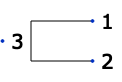

In [42]:
print(T[:i],T[i:]); h.afficher_tas(T[:i])

In [43]:
i = 2; T[i],T[0] = T[0],T[i]; descendre(T,0,i)

[2, 1] [3, 4, 5, 6, 7]


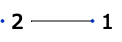

In [44]:
print(T[:i],T[i:]); h.afficher_tas(T[:i])

In [ ]:
i = 1; T[i],T[0] = T[0],T[i]; descendre(T,0,i)

In [ ]:
print(T[:i],T[i:]); h.afficher_tas(T[:i])

## Conclusions

Un tas est un tableau de $n$ éléments organisé de manière à respecter la condition de tas. On peut le concevoir mentalement comme un arbre binaire.

L'**insertion** a une complexité $\Theta(\log n)$.

Le **sommet** du tas est à l'indice $0$. On le trouve en $\Theta(1)$.

**Supprimer le sommet** du tas a une complexité $\Theta(\log n)$.

**Créer un tas** à partir d'un tableau a une complexité $\Theta(n)$.

Le **tri par tas** améliore le tri par sélection en utilisant un tas pour trouver le maximum. Il a une complexité $\Theta(n \log n)$.

<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>

<style type="text/css">
.reveal {
font-size: 200%;
}</style>